# RFM Model
#### R:represents how many days have passed since the last purchase. F:represents how many times have been purchased.                                      M:represents the total purchase amount.

#### This dataset is the sales data of a brand's flagship store. This project uses this dataset to construct an RFM model and visually observe the results of customer tag layering. The RFM model can be targeted to refine operations and sprint performance.

In [1]:
# import pandas
import pandas as pd      

In [2]:
# read the dataset
df = pd.read_excel("RFM.xlsx")
df

,品牌名称,买家昵称,付款日期,订单状态,实付金额,邮费,省份,城市,购买数量,下单次数
0,SW,叫我李2,2020-01-01 00:17:59,交易成功,186,6,上海,上海市,1,21.0
1,SW,0cyb1992,2020-01-01 00:59:54,交易成功,145,0,广东省,广州市,1,14.0
2,SW,萝污萌莉,2020-01-01 07:48:48,交易成功,194,8,山东省,东营市,1,13.5
3,SW,atblovemyy,2020-01-01 09:15:49,交易成功,84,0,江苏省,镇江市,1,2.3
4,SW,小星期鱼,2020-01-01 09:59:33,交易成功,74,0,上海,上海市,1,15.2
...,...,...,...,...,...,...,...,...,...,...
28828,SW,nhuliy5,2020-06-30 22:22:09,交易成功,144,0,湖南省,长沙市,1,0.7
28829,SW,2ganlin7,2020-06-30 22:33:43,交易成功,216,0,安徽省,滁州市,1,1.1
28830,SW,点大a,2020-06-30 22:36:53,交易成功,231,0,湖北省,武汉市,1,1.4
28831,SW,8陈爷558989,2020-06-30 22:44:38,交易成功,99,0,广东省,深圳市,2,0.7


In [3]:
# R value acquisition: how many days have passed since the last purchase of each user
# Use the groupby() function to group by "buyer nickname", then select the maximum value of "payment date" and assign it to r
r = df['付款日期'].groupby(df['买家昵称']).max()
# Use the reset_index() function to restore the index of r and assign it to r again
r = r.reset_index()
# Use the to_datetime() function to convert the deadline October 1, 2020 into a time type and assign it to endTime
endtime = pd.to_datetime('2020-10-1')
# Calculate the difference between the endTime and the value in the "Payment Date" column
# Use .dt to get the data, then use the .days attribute to extract the number of days and assign it to r["R"]
r['R'] = (endtime - r['付款日期']).dt.days
r

,买家昵称,付款日期,R
0,.blue_ram,2020-02-04 17:49:34,239
1,.christiny,2020-01-29 14:17:15,245
2,.willn1,2020-01-11 03:46:18,263
3,.托托m,2020-01-11 02:26:33,263
4,0000妮,2020-06-28 16:53:26,94
...,...,...,...
25944,龙火师,2020-04-07 08:43:00,176
25945,龙魔鬼女,2020-04-19 22:14:24,164
25946,龟mil宝,2020-06-19 04:26:31,103
25947,！谢鹏逗逼？,2020-06-06 11:14:52,116


In [4]:
# F value acquisition: cumulative purchase frequency of each user
# Extract the two columns of "Buyer's Nickname" and "Number of Orders" and assign them to f
f = df[['买家昵称', '下单次数']]
# Modify the index names of all columns of f to "buyer nickname", "F"
f.columns = ['买家昵称', 'F']
f

,买家昵称,F
0,叫我李2,21.0
1,0cyb1992,14.0
2,萝污萌莉,13.5
3,atblovemyy,2.3
4,小星期鱼,15.2
...,...,...
28828,nhuliy5,0.7
28829,2ganlin7,1.1
28830,点大a,1.4
28831,8陈爷558989,0.7


In [5]:
# M value acquisition: total amount of each user
# Use the groupby() function, group by "buyer's nickname", then sum according to "actual amount" and assign it to m
m = df['实付金额'].groupby(df['买家昵称']).sum()
# Use the reset_index() function to restore the index of m and assign it to m again
m = m.reset_index()
# Rename all the column names in m to "buyer nickname", "M"
m.columns = ['买家昵称', 'M']
m

,买家昵称,M
0,.blue_ram,49
1,.christiny,183
2,.willn1,34
3,.托托m,37
4,0000妮,164
...,...,...
25944,龙火师,175
25945,龙魔鬼女,87
25946,龟mil宝,497
25947,！谢鹏逗逼？,137


In [6]:
# Use the pd.merge() function to combine r and f and assign them to rf
rf = pd.merge(r, f)
# Use the pd.merge() function to combine rf and m and assign them to rfm
rfm = pd.merge(rf, m)
print(rfm)

             买家昵称                付款日期    R    F    M
0       .blue_ram 2020-02-04 17:49:34  239  2.1   49
1      .christiny 2020-01-29 14:17:15  245  1.9  183
2         .willn1 2020-01-11 03:46:18  263  5.0   34
3            .托托m 2020-01-11 02:26:33  263  5.2   37
4           0000妮 2020-06-28 16:53:26   94  0.9  164
...           ...                 ...  ...  ...  ...
28828        龙魔鬼女 2020-04-19 22:14:24  164  1.5   87
28829       龟mil宝 2020-06-19 04:26:31  103  2.3  497
28830       龟mil宝 2020-06-19 04:26:31  103  0.9  497
28831      ！谢鹏逗逼？ 2020-06-06 11:14:52  116  1.1  137
28832        ～小邱～ 2020-01-23 23:51:51  251  1.9  185

[28833 rows x 5 columns]


In [7]:
# Use the qcut() function for rfm to bin the data in the "R" column and divide them into 2 groups. Name the interval markers 1-0 points and assign them to the "R-SCORE" column
rfm['R-SCORE'] = pd.qcut(rfm['R'], q = 2, labels = [1, 0])
# Use the qcut() function for rfm to bin the data in the "F" column and divide them into 2 groups. The interval markers are named 0-1 points and assigned to the "F-SCORE" column
rfm['F-SCORE'] = pd.qcut(rfm['F'], q=2, labels = [0,1])
# Use the qcut() function for rfm to bin the data in the "F" column and divide them into 2 groups. Name the interval markers 0-1 points and assign them to the "M-SCORE" column
rfm['M-SCORE'] = pd.qcut(rfm['M'], q=2, labels = [0,1])

In [8]:
# Use the astype() function to convert the three columns "R-SCORE", "F-SCORE", and "M-SCORE" in rfm into string format
# Use "+" to splice the strings together to form a new column "mark"
rfm["mark"] = rfm["R-SCORE"].astype(str) + rfm["F-SCORE"].astype(str) + rfm["M-SCORE"].astype(str)

In [9]:
# Define a function rfmType to convert values such as "111" and "110" into corresponding user levels
def rfmType(x):
    if x == "111":
        return "High Value Customers"
    elif x == "101":
        return "Key Development Customers"
    elif x == "011":
        return "Key Return Customers"
    elif x == "001":
        return "Key Potential Customers"
    elif x == "110":
        return "General Potential Customers"
    elif x == "100":
        return "General Development Customers"
    elif x == "010":
        return "General Maintenance Customers"
    else:
        return "Low Value Users"

In [10]:
# For the "mark" column in rfm, use the apply() function to call the rfmType function and assign it to the "crowd type"
rfm["人群类型"] = rfm["mark"].apply(rfmType)

In [11]:
# Use groupby() function to classify rfm["crowd type"] according to "crowd type"
# Then use the count() function to aggregate and assign to the variable df_type
df_type = rfm["人群类型"].groupby(rfm["人群类型"]).count()

In [12]:
# print df_type
print(df_type)

人群类型
General Development Customers    5488
General Maintenance Customers    6304
General Potential Customers      1140
High Value Customers             1955
Key Development Customers        5989
Key Potential Customers          1514
Key Return Customers             4914
Low Value Users                  1529
Name: 人群类型, dtype: int64


In [13]:
# import matplotlib.pyplot
import matplotlib.pyplot as plt

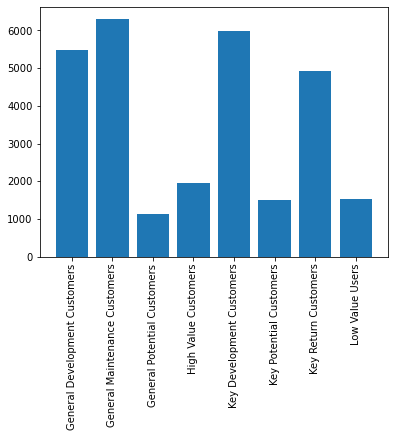

In [14]:
# Customers Type Visualisation
plt.bar(df_type.index, df_type.values)
# Use the plt.tight_layout() function to adjust the sub-picture layout
plt.tight_layout()
# Rotate x axis for 90 degree
plt.xticks(rotation=90)
# Use plt.show() function to display image
plt.show()